In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import math

In [2]:
data = np.zeros((2400, 28*28))
for i in range(1, 2401, 1):
    im = mpimg.imread("Train/%d.jpg"%(i))
    data[i-1, :] = np.array(im).reshape(-1)/255
labels = np.loadtxt("Train/Training Labels.txt", dtype=int)
labels_onehot = np.eye(10, dtype=int)[labels]

In [3]:
mean = np.zeros((10, 28*28))
count = np.zeros((10, 1))
for i in range(0, 2400):
    num = labels[i]
    mean[num, :] += data[i, :]
    count[num, 0] += 1
mean = mean/count

In [4]:
var = np.zeros((10, 28*28))
for i in range(0, 2400):
    num = labels[i]
    var[num, :] += (data[i, :] - mean[num, :]) ** 2
std = (var/count)

In [5]:
tdata = np.zeros((200, 28*28))
for i in range(1, 201, 1):
    im = mpimg.imread("Test/%d.jpg"%(i))
    tdata[i-1, :] = np.array(im).reshape(1, -1)/255
tlabels = np.loadtxt("Test/Test Labels.txt", dtype=int)

In [6]:
# std is variance not std

preds = np.zeros((200, 10))

beta = 1e-13
for i in range(0, 200):
    prob = 0.001+(1/(beta +  (std *2*3.14)**0.5))*np.exp(-((mean-tdata[i, :])**2)/(beta + 2 * std))
    for z in range(prob.shape[0]):
        for j in range(prob.shape[1]):
            if (prob[z, j] > 1):
                prob[z, j] = 1
    preds[i, :] = np.prod(prob, axis=1)
preds[199, :]

array([6.69259076e-176, 1.22289805e-306, 7.73085246e-142, 1.26614867e-146,
       4.74905707e-059, 9.76256392e-104, 2.47719148e-200, 2.72215904e-100,
       1.91011039e-102, 1.77420923e-050])

[0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 6 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 8 5 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 9 4 4 4 4 4 4 2 4 4 4 8 4 9 4 4 8 4 9 9 5 5 5 5 5 5 5 5 5 4
 5 5 2 5 3 5 5 5 5 6 6 2 6 6 0 6 0 6 6 6 6 6 6 6 6 6 2 6 2 7 7 7 7 7 7 7 7
 7 4 7 7 7 9 4 9 7 7 7 4 8 8 8 8 8 8 8 8 8 8 8 8 8 2 8 8 9 3 8 5 9 9 9 0 7
 4 2 8 9 9 4 9 9 9 4 4 4 4 9 9]
0.7999999999999999


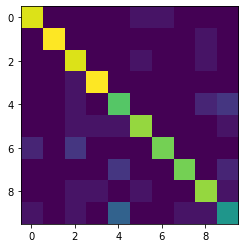

In [7]:
conf_mat = np.zeros((10, 10))
preds_num = preds.argmax(axis=1)
print(preds_num)
for i in range(preds_num.shape[0]):
    conf_mat[tlabels[i], preds_num[i]] += 1
summ = 0
for i in range(10):
    summ += conf_mat[i, i] / 200
print(summ)
plt.imshow(conf_mat)
plt.savefig("Confusion-Gauss.jpg.jpg")